In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = {
    'points':['P1','P2','P3','P4','P5','P6','P7','P8',],
    'x':[0.1,0.15,0.08,0.16,0.2,0.25,0.24,0.3],
    'y':[0.6,0.71,0.9,0.85,0.3,0.5,0.1,0.2]
}

In [3]:
df = pd.DataFrame(data)
df

,points,x,y
0,P1,0.10,0.60
1,P2,0.15,0.71
2,P3,0.08,0.90
3,P4,0.16,0.85
4,P5,0.20,0.30
5,P6,0.25,0.50
6,P7,0.24,0.10
7,P8,0.30,0.20


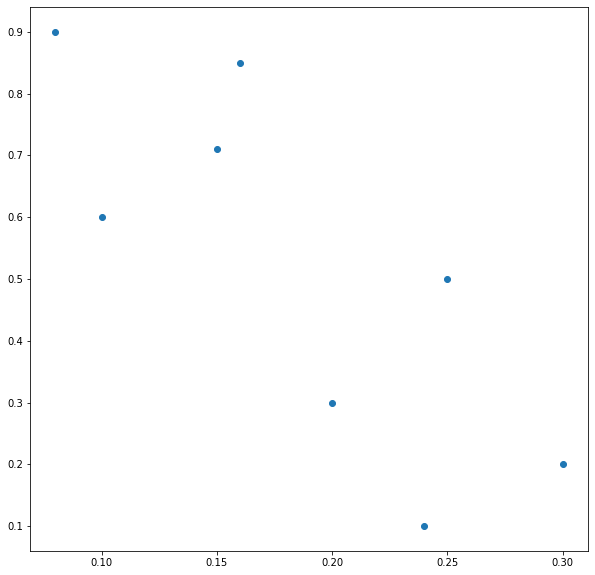

In [4]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.scatter(x=df['x'], y=df['y'])

In [5]:
X = df[['x','y']]
X

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


In [6]:
x = np.array(X)

In [7]:
class KMeans:
    def __init__(self, k=2):
        self.k = k
        
        self.x = None
        self.centroids = None
        self.clusters = None
    
    @staticmethod
    def euclidean_distance(p1, p2):
        sq_diff = 0
        for x1,x2 in zip(p1,p2):
            sq_diff += (x1-x2)**2
        return math.sqrt(sq_diff)
    
    def calculate_centroids(self):
        centroids = []
        for cluster in self.clusters:
            points = self.x[cluster]
            centroids.append(np.mean(points, axis=0))
            
        return centroids
    
    def calculate_error(self, centroids):
        error = 0
        for p1,p2 in zip(self.centroids, centroids):
            error += self.euclidean_distance(p1,p2)
        
        return error
            
    def fit(self, x):
        self.x = x
        # init centroids
        self.centroids = [x[i] for i in range(self.k)]
        
        
        error = math.inf
        while error:
            self.clusters = [[] for i in range(self.k)]
            
            for i in range(len(self.x)):
                distances = [KMeans.euclidean_distance(ci, self.x[i]) for ci in self.centroids]
                c_idx = np.argmin(distances)
                self.clusters[c_idx].append(i)
                
            new_centroids = self.calculate_centroids()
            error = self.calculate_error(new_centroids)
            print(self.centroids)
            print(new_centroids)
            print(error, "\n")
            self.centroids = new_centroids

In [8]:
kmeans = KMeans(k=2)
kmeans.fit(x)

[array([0.1, 0.6]), array([0.15, 0.71])]
[array([0.218, 0.34 ]), array([0.13, 0.82])]
0.39732747841995536 

[array([0.218, 0.34 ]), array([0.13, 0.82])]
[array([0.2475, 0.275 ]), array([0.1225, 0.765 ])]
0.12689002816417763 

[array([0.2475, 0.275 ]), array([0.1225, 0.765 ])]
[array([0.2475, 0.275 ]), array([0.1225, 0.765 ])]
0.0 



In [9]:
centroids = np.array(kmeans.centroids)
centroids

array([[0.2475, 0.275 ],
       [0.1225, 0.765 ]])

In [10]:
kmeans.clusters

[[4, 5, 6, 7], [0, 1, 2, 3]]

In [11]:
for cluster in kmeans.clusters:
    print(x[cluster], "\n")

[[0.2  0.3 ]
 [0.25 0.5 ]
 [0.24 0.1 ]
 [0.3  0.2 ]] 

[[0.1  0.6 ]
 [0.15 0.71]
 [0.08 0.9 ]
 [0.16 0.85]] 



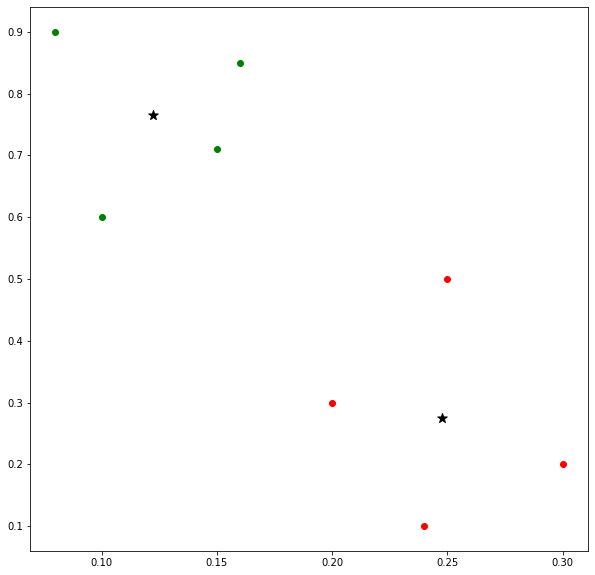

In [12]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()

ax.scatter(x=centroids[:,0], y=centroids[:,1], marker='*', s=100, c='black')

cluster = X.iloc[kmeans.clusters[0]]
ax.scatter(x=cluster['x'], y=cluster['y'], c='red')

cluster = X.iloc[kmeans.clusters[1]]
ax.scatter(x=cluster['x'], y=cluster['y'], c='green')